## simple contour properties <br>

1. Centroid/Center of Mass.<br>
2. Area <br>
3. Perimeter <br>
4. Bounding boxes <br>
5. Rotated bounding boxes <br>
6. Minimum enclosing circles <br>
7. Fitting an ellipse <br>

In [1]:
import numpy as np
import imutils
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

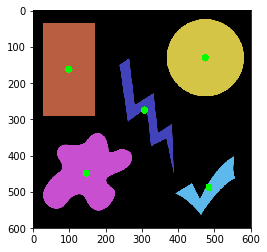

In [2]:
#1. Center of the Mass:

file = '/mnt/c/cnn_dl/data/more_shapes.png'

image = cv2.imread(file)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY )

#find external contours in the image;
cnts = cv2.findContours( gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE )
cnts = imutils.grab_contours(cnts)
clone = image.copy()

#loop over the contours
for c in cnts:
    #compute centroid using moments methods;
    M = cv2.moments(c)
    cX = int( M['m10'] / M["m00"])
    cY = int( M['m01'] / M['m00'])
    
    #draw the center of the contour on the image
    cv2.circle( clone, (cX,cY), 10, (0,255,0), -1 )
    
plt.imshow( clone )


## area and perimeter <br>
the area od the contour is the number of pixels that reside inside the contour outline. <br>
the perimeter or arc lenght is the lenght of the contour. 

Contour #1 -- area: 8049.50, perimeter: 577.39
Contour #2 -- area: 30873.00, perimeter: 893.32
Contour #3 -- area: 10435.50, perimeter: 1038.54
Contour #4 -- area: 36751.00, perimeter: 800.00
Contour #5 -- area: 35702.00, perimeter: 705.07


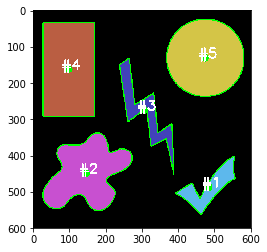

In [5]:
#area and perimeter;

for (i,c) in enumerate(cnts):
    #computer the area and perimeter of the contours
    area = cv2.contourArea(c)
    perimeter = cv2.arcLength(c, True )
    print("Contour #{} -- area: {:.2f}, perimeter: {:.2f}".format(i + 1, area, perimeter))
   
    
    #draw the contour of the image
    cv2.drawContours( clone, [c], -1, (0,255,0), 2)
    
    #computer the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int( M['m10'] / M['m00'] )
    cY = int( M['m01'] / M['m00'] )
    
    cv2.putText( clone, "#{}".format( i+ 1 ), (cX - 20 , cY ), cv2.FONT_HERSHEY_SIMPLEX, 1.25, (255,255,255), 4 )
    
plt.imshow(clone)

## Bounding Boxes <br>
Rectangle box of the image and it has 4 components: x and y-co-oridinates, width and height of the box;

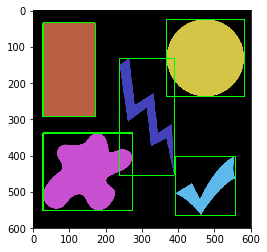

In [6]:
clone = image.copy()

#loop over the contours
for c in cnts:
    # fit a bounding box to the contour;
    (x,y,w,h) = cv2.boundingRect(c)
    cv2.rectangle( clone, ( x,y), ( x + w, y + h ), (0,255,0), 2 )
    
plt.imshow(clone)

## Rotated Bounding Boxes <br>


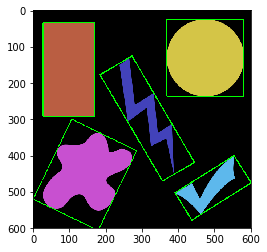

In [8]:
clone = image.copy()

for c in cnts:
    # fit a rotated bounding in to a box
    box = cv2.minAreaRect(c)
    box = np.int0(cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box))
    cv2.drawContours( clone, [box], -1, (0,255,0), 2 )
    
plt.imshow(clone)

## Minimum enclosing circles

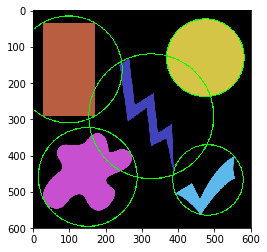

In [10]:

clone = image.copy()

# loop over the contours
for c in cnts:
    # fit a minimum enclosing circle to the contour
    ((x, y), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(clone, (int(x), int(y)), int(radius), (0, 255, 0), 2)
    
plt.imshow( clone )

## Fitting an Ellipse 

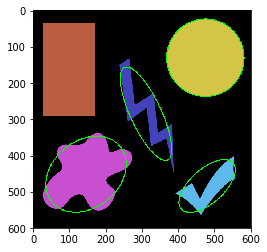

In [12]:
clone = image.copy()

for c in cnts:
    # to fit ellipse; at least 5 points in the contours
    if len(c) >= 5:
        ellipse = cv2.fitEllipse(c)
        cv2.ellipse( clone, ellipse, (0,255,0), 2)
        
plt.imshow(clone)

## Advance Properties <br>
1. Aspect Ratio <br>
2. Extent <br>
3. Convex hull <br>
4. Solidity <br>
